### Ideas

1. Use logistic regression/decision trees to predict if company would be ideal location to work?
2. Age, location, Gender plays a role? Test correlation
3. Look at importance of factors

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

%matplotlib inline
sns.set_style("dark")

In [103]:
!echo %cd% 

E:\Courses\Mentalhealth_project\scripts 


# Prepare codebook

In [4]:
data = pd.read_csv("../data/raw_data.csv", encoding='latin-1')
df = data.copy()
df.columns = ['C'+ str(i + 1) for i in range(len(df.columns))]
d = zip(data.columns,df.columns)
pd.options.display.max_rows = 65
codebook = pd.DataFrame([dict(d)]).T.reset_index().rename(columns = {"index":"Old_names",0:"New_names"})

if os.path.exists("../docs/Codebook.csv"):
    os.remove("../docs/Codebook.csv")
    
codebook.sort_values(by = ['New_names']).to_csv("../docs/Codebook.csv",index=False)

In [5]:
data.head()

,Unnamed: 0,Are.you.self.employed.,How.many.employees.does.your.company.or.organization.have.,Is.your.employer.primarily.a.tech.company.organization.,Is.your.primary.role.within.your.company.related.to.tech.IT.,Does.your.employer.provide.mental.health.benefits.as.part.of.healthcare.coverage.,Do.you.know.the.options.for.mental.health.care.available.under.your.employer.provided.coverage.,Has.your.employer.ever.formally.discussed.mental.health..for.example..as.part.of.a.wellness.campaign.or.other.official.communication..,Does.your.employer.offer.resources.to.learn.more.about.mental.health.concerns.and.options.for.seeking.help.,Is.your.anonymity.protected.if.you.choose.to.take.advantage.of.mental.health.or.substance.abuse.treatment.resources.provided.by.your.employer.,...,If.you.have.a.mental.health.issue..do.you.feel.that.it.interferes.with.your.work.when.being.treated.effectively.,If.you.have.a.mental.health.issue..do.you.feel.that.it.interferes.with.your.work.when.NOT.being.treated.effectively.,What.is.your.age.,What.is.your.gender.,What.country.do.you.live.in.,What.US.state.or.territory.do.you.live.in.,What.country.do.you.work.in.,What.US.state.or.territory.do.you.work.in.,Which.of.the.following.best.describes.your.work.position.,Do.you.work.remotely.
0,1,0,26-100,1.0,NaN,Not eligible for coverage / N/A,NaN,No,No,I don't know,...,Not applicable to me,Not applicable to me,39,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes
1,2,0,6-25,1.0,NaN,No,Yes,Yes,Yes,Yes,...,Rarely,Sometimes,29,male,United States of America,Illinois,United States of America,Illinois,Back-end Developer|Front-end Developer,Never
2,3,0,6-25,1.0,NaN,No,NaN,No,No,I don't know,...,Not applicable to me,Not applicable to me,38,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Always
3,4,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Sometimes,Sometimes,43,male,United Kingdom,NaN,United Kingdom,NaN,Supervisor/Team Lead,Sometimes
4,5,0,6-25,0.0,1.0,Yes,Yes,No,No,No,...,Sometimes,Sometimes,43,Female,United States of America,Illinois,United States of America,Illinois,Executive Leadership|Supervisor/Team Lead|Dev ...,Sometimes


In [6]:
df.columns = ['C'+ str(i + 1) for i in range(len(data.columns))]
df.head()

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,...,C55,C56,C57,C58,C59,C60,C61,C62,C63,C64
0,1,0,26-100,1.0,NaN,Not eligible for coverage / N/A,NaN,No,No,I don't know,...,Not applicable to me,Not applicable to me,39,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes
1,2,0,6-25,1.0,NaN,No,Yes,Yes,Yes,Yes,...,Rarely,Sometimes,29,male,United States of America,Illinois,United States of America,Illinois,Back-end Developer|Front-end Developer,Never
2,3,0,6-25,1.0,NaN,No,NaN,No,No,I don't know,...,Not applicable to me,Not applicable to me,38,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Always
3,4,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Sometimes,Sometimes,43,male,United Kingdom,NaN,United Kingdom,NaN,Supervisor/Team Lead,Sometimes
4,5,0,6-25,0.0,1.0,Yes,Yes,No,No,No,...,Sometimes,Sometimes,43,Female,United States of America,Illinois,United States of America,Illinois,Executive Leadership|Supervisor/Team Lead|Dev ...,Sometimes


In [7]:
cb = pd.read_csv("../docs/Codebook.csv", encoding='latin-1')
cb

,Old_names,New_names
0,Unnamed: 0,C1
1,Is.your.anonymity.protected.if.you.choose.to.t...,C10
2,If.a.mental.health.issue.prompted.you.to.reque...,C11
3,Do.you.think.that.discussing.a.mental.health.d...,C12
4,Do.you.think.that.discussing.a.physical.health...,C13
5,Would.you.feel.comfortable.discussing.a.mental...,C14
6,Would.you.feel.comfortable.discussing.a.mental...,C15
7,Do.you.feel.that.your.employer.takes.mental.he...,C16
8,Have.you.heard.of.or.observed.negative.consequ...,C17
9,Do.you.have.medical.coverage..private.insuranc...,C18


# Cleansing data

In [83]:
df.dtypes

C1       int64
C2       int64
C3      object
C4     float64
C5     float64
C6      object
C7      object
C8      object
C9      object
C10     object
C11     object
C12     object
C13     object
C14     object
C15     object
C16     object
C17     object
C18    float64
C19     object
C20     object
C21     object
C22     object
C23     object
C24     object
C25     object
C26      int64
C27     object
C28     object
C29     object
C30     object
C31     object
C32     object
C33     object
C34     object
C35     object
C36     object
C37     object
C38     object
C39     object
C40     object
C41     object
C42     object
C43     object
C44     object
C45     object
C46     object
C47     object
C48     object
C49     object
C50     object
C51     object
C52     object
C53     object
C54      int64
C55     object
C56     object
C57      int64
C58     object
C59     object
C60     object
C61     object
C62     object
C63     object
C64     object
dtype: object

### Classifying gender into 3 groups for ease of analysis - Male, Female and NB

In [8]:
df.C58.unique()

array(['Male', 'male', 'Male ', 'Female', 'M', 'female', 'm',
       'I identify as female.', 'female ', 'Bigender', 'non-binary',
       'Female assigned at birth ', 'F', 'Woman', 'man', 'fm', 'f',
       'Cis female ', 'Transitioned, M2F', 'Genderfluid (born female)',
       'Other/Transfeminine', 'Female or Multi-Gender Femme', 'Female ',
       'woman', 'female/woman', 'Cis male', 'Male.', 'Androgynous',
       'male 9:1 female, roughly', nan, 'Male (cis)', 'Other',
       'nb masculine', 'Cisgender Female', 'Man', 'Sex is male',
       'none of your business', 'genderqueer', 'cis male', 'Human',
       'Genderfluid', 'Enby', 'Malr', 'genderqueer woman', 'mtf', 'Queer',
       'Agender', 'Dude', 'Fluid',
       "I'm a man why didn't you make this a drop down question. You should of asked sex? And I would of answered yes please. Seriously how much text can this take? ",
       'mail', 'M|', 'Male/genderqueer', 'fem', 'Nonbinary', 'male ',
       'human', 'Female (props for making th

In [74]:
# clean the genders by grouping the genders into 3 categories: Female, Male, Genderqueer/Other
# sourced from https://www.kaggle.com/jchen2186/data-visualization-with-python-seaborn

df['C58'] = df['C58'].replace([
    'male', 'Male ', 'M', 'm', 'man', 'Cis male',
    'Male.', 'Male (cis)', 'Man', 'Sex is male',
    'cis male', 'Malr', 'Dude', "I'm a man why didn't you make this a drop down question. You should of asked sex? And I would of answered yes please. Seriously how much text can this take? ",
    'mail', 'M|', 'male ', 'Cis Male', 'Male (trans, FtM)',
    'cisdude', 'cis man', 'MALE'], 'Male')
df['C58'] = df['C58'].replace([
    'female', 'I identify as female.', 'female ',
    'Female assigned at birth ', 'F', 'Woman', 'fm', 'f',
    'Cis female', 'Transitioned, M2F', 'Female or Multi-Gender Femme',
    'Female ', 'woman', 'female/woman', 'Cisgender Female', 
    'mtf', 'fem', 'Female (props for making this a freeform field, though)',
    ' Female', 'Cis-woman', 'AFAB', 'Transgender woman',
    'Cis female '], 'Female')
df['C58'] = df['C58'].replace([
    'Bigender', 'non-binary,', 'Genderfluid (born female)',
    'Other/Transfeminine', 'Androgynous', 'male 9:1 female, roughly',
    'nb masculine', 'genderqueer', 'Human', 'Genderfluid',
    'Enby', 'genderqueer woman', 'Queer', 'Agender', 'Fluid',
    'Genderflux demi-girl', 'female-bodied; no feelings about gender',
    'non-binary', 'Male/genderqueer', 'Nonbinary', 'Other', 'none of your business',
    'Unicorn', 'human', 'Genderqueer'], 'Non-binary')

# replace the one null with Male, the mode gender, so we don't have to drop the row
df['C58'] = df['C58'].replace(np.NaN, 'Male')

### Removing self employed professionals from analysis for tech companies

In [83]:
#Removing self employed professionals for the sake of this analysis
df = df.query('C2 == 0')

In [74]:
a = df.applymap(np.isreal).all()

In [79]:
df.iloc[:,-np.where(a)[0]].head()

,C1,C64,C62,C61,C48,C40,C12,C9
0,1,Sometimes,NaN,United Kingdom,Yes,Maybe,No,No
1,2,Never,Illinois,United States of America,Yes,No,No,Yes
2,3,Always,NaN,United Kingdom,Maybe,Yes,Maybe,No
3,4,Sometimes,NaN,United Kingdom,Yes,Maybe,NaN,NaN
4,5,Sometimes,Illinois,United States of America,Yes,No,Yes,No


In [13]:
df.C6.unique()

array(['Not eligible for coverage / N/A', 'No', nan, 'Yes', "I don't know"], dtype=object)

In [14]:
df.C7.unique()

array([nan, 'Yes', 'I am not sure', 'No'], dtype=object)

# Summary tables

In [87]:
df.describe(include = [np.object])

,C3,C6,C7,C8,C9,C10,C11,C12,C13,C14,...,C53,C55,C56,C58,C59,C60,C61,C62,C63,C64
count,1146,1146,1013,1146,1146,1146,1146,1146,1146,1146,...,711,1433,1433,1430,1433,840,1433,851,1433,1433
unique,6,4,3,3,3,3,6,3,3,3,...,116,5,5,70,53,47,53,48,264,3
top,26-100,Yes,No,No,No,I don't know,Somewhat easy,Maybe,No,Maybe,...,"Mood Disorder (Depression, Bipolar Disorder, etc)",Not applicable to me,Often,Male,United States of America,California,United States of America,California,Back-end Developer,Sometimes
freq,292,531,354,813,531,742,281,487,837,479,...,187,557,538,610,840,130,851,141,263,757


In [97]:
df.describe(include = [np.number])

,C1,C2,C4,C5,C18,C26,C54,C57
count,1433.00000,1433.000000,1146.000000,263.000000,287.000000,1433.000000,1433.000000,1433.000000
mean,717.00000,0.200279,0.770506,0.942966,0.644599,0.882066,0.585485,34.286113
std,413.81578,0.400349,0.420691,0.232350,0.479471,0.322643,0.492810,11.290931
min,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
25%,359.00000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,28.000000
50%,717.00000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,33.000000
75%,1075.00000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,39.000000
max,1433.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,323.000000


# Exploration using bars

In [126]:
def plotBar(var, data,title,filename = None):
    '''
    This function takes in a pandas data frame and a column and prints/saves count of instances in a categorical variable
    Users can specify where this file needs to be saved
    
    Args: var - variable to plot
          data - input data
          title - Graph title
          filename - Location of saved image
    '''
    bar_df = data[[var]].groupby([var]).size().reset_index(name='count')
    bar_plot = sns.barplot(x = var,y = "count",data = bar_df)
    plt.ylabel("count")
    plt.xlabel(" ")
    plt.title("{0} Distribution".format(title))
    fig = bar_plot.get_figure()
    if(filename is not None):
        fig.savefig(filename + ".png")
    

In [100]:
cb.loc[cb['Old_names'] == 'Do.you.currently.have.a.mental.health.disorder.'][['New_names']]

,New_names
43,C49


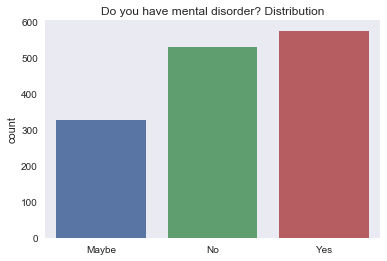

In [128]:
plotBar("C49",df,"Do you have mental disorder?","../results/bar1")

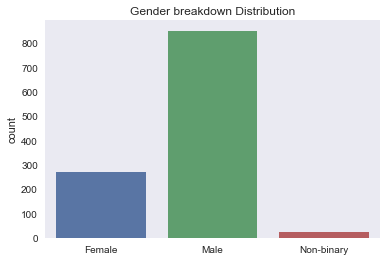

In [87]:
plotBar("C58",df,"Gender breakdown")

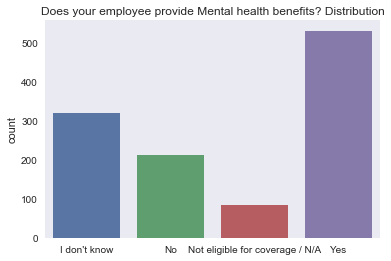

In [88]:
plotBar("C6",df,"Does your employee provide Mental health benefits?")

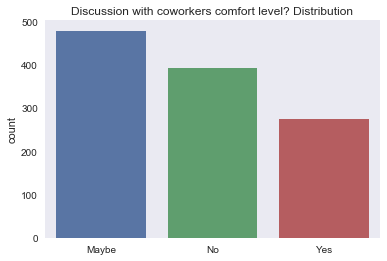

In [91]:
plotBar("C14",df,"Discussion with coworkers comfort level?")

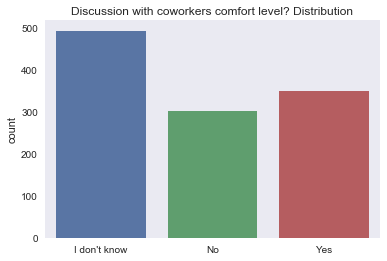

In [92]:
plotBar("C16",df,"Discussion with coworkers comfort level?")